In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set_context("paper")
warnings.filterwarnings("ignore")

In [2]:
# File paths
assessments_file_path = r"D:\Final Project\Data Engineering\Staging\mart\stg_assessments.csv"
courses_file_path = r"D:\Final Project\Data Engineering\Staging\mart\stg_courses.csv"
course_skill_mapping_file_path = r"D:\Final Project\Data Engineering\Staging\mart\stg_courses_skills.csv"
skills_file_path = r"D:\Final Project\Data Engineering\Staging\mart\stg_skills.csv"
employee_skill_proficiency_file_path = r"D:\Final Project\Data Engineering\Staging\mart\stg_employee_skill_proficiency.csv"
employee_file_path = r"D:\Final Project\Data Engineering\Staging\mart\stg_employees.csv"
employee_certifications_file_path = r"D:\Final Project\Data Engineering\Raw\employee_certifications 1.csv"

assessments_df = pd.read_csv(assessments_file_path)
courses_df = pd.read_csv(courses_file_path)
course_skill_df = pd.read_csv(course_skill_mapping_file_path)
skills_df = pd.read_csv(skills_file_path)
employee_skill_proficiency_df = pd.read_csv(employee_skill_proficiency_file_path)
employees_df = pd.read_csv(employee_file_path)
employee_certifications_df = pd.read_csv(employee_certifications_file_path)

In [3]:
courses_df.head(10)

,CourseID,CourseName,CourseDuration,Description
0,1,Introduction to Data Science,4,Learn the basics of data science
1,2,Machine Learning Basics,6,Understand the fundamentals of machine learnin...
2,3,Deep Learning with TensorFlow,8,A deep dive into deep learning concepts using ...
3,4,Statistical Analysis with R,5,Learn statistical methods and their applicatio...
4,5,Data Visualization with Python,3,Visualize data effectively using Python librar...
5,6,Data Science Capstone Project,10,Integrate data science skills to complete a re...
6,7,Advanced Data Analysis Techniques,6,Explore advanced methods for data analysis in ...
7,8,Introduction to Big Data,4,Learn the concepts and tools used in Big Data ...
8,9,Data Ethics and Privacy,3,Understand the ethical implications and privac...
9,10,Time Series Analysis,5,Learn to analyze and forecast time-dependent d...


In [4]:
# 1. Join Employees and EmployeeSkillProficiency on 'empID' and 'empId'
employee_skills = pd.merge(employees_df, employee_skill_proficiency_df, left_on='empid', right_on='empid', how='left')

# 2. Join the result with Skills on 'skillID'
employee_skills = pd.merge(employee_skills, skills_df, on='skillid', how='left')

# 3. Join the result with Assessments on 'empID' and 'skillID'
employee_skills_assessments = pd.merge(employee_skills, assessments_df, on=['empid', 'skillid'], how='left')

# 4. Join the result with EmployeeCertifications on 'empID'
employee_certifications = pd.merge(employee_skills_assessments, employee_certifications_df, left_on='empid',  right_on = "empID",how='left')

# 5. Finally, join with Courses on 'courseID'
final_df = pd.merge(employee_certifications, courses_df, left_on='courseid', right_on="CourseID",how='left')

# Display the final joined DataFrame
final_df


,empid,empname,designation,experience,birth_date,hire_date,salary,gender,activestatus,created_at,...,test_taken,test_completed,empID,courseID,startDate,completionDate,CourseID,CourseName,CourseDuration,Description
0,1,Alice Johnson,Software Engineer,3,1990-05-15,2021-06-01,75000,Female,Active,2021-06-01 09:00:00,...,2024-11-01,2024-11-15,1,1,1/10/2023 9:00,3/10/2023 17:00,1.0,Introduction to Data Science,4.0,Learn the basics of data science
1,1,Alice Johnson,Software Engineer,3,1990-05-15,2021-06-01,75000,Female,Active,2021-06-01 09:00:00,...,2024-11-01,2024-11-15,1,1,1/10/2023 9:00,3/10/2023 17:00,2.0,Machine Learning Basics,6.0,Understand the fundamentals of machine learnin...
2,1,Alice Johnson,Software Engineer,3,1990-05-15,2021-06-01,75000,Female,Active,2021-06-01 09:00:00,...,2024-11-05,2024-11-15,1,1,1/10/2023 9:00,3/10/2023 17:00,1.0,Introduction to Data Science,4.0,Learn the basics of data science
3,1,Alice Johnson,Software Engineer,3,1990-05-15,2021-06-01,75000,Female,Active,2021-06-01 09:00:00,...,2024-11-10,2024-11-20,1,1,1/10/2023 9:00,3/10/2023 17:00,2.0,Machine Learning Basics,6.0,Understand the fundamentals of machine learnin...
4,1,Alice Johnson,Software Engineer,3,1990-05-15,2021-06-01,75000,Female,Active,2021-06-01 09:00:00,...,NaN,NaN,1,1,1/10/2023 9:00,3/10/2023 17:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,146,Owen Scott,Solutions Enabler,3,1993-02-14,2021-06-01,83000,Male,Active,2021-06-01 09:00:00,...,NaN,NaN,146,26,3/6/2023 8:30,5/6/2023 14:00,NaN,NaN,NaN,NaN
529,147,Emma Clark,Principal Architect,10,1984-09-15,2013-08-20,162000,Female,Active,2013-08-20 10:30:00,...,NaN,NaN,147,27,4/16/2023 9:00,6/16/2023 14:00,NaN,NaN,NaN,NaN
530,148,Max Taylor,Sr. Software Engineer,6,1986-10-04,2015-05-20,95000,Male,Active,2015-05-20 11:00:00,...,NaN,NaN,148,28,1/12/2023 10:00,3/12/2023 15:00,NaN,NaN,NaN,NaN
531,149,Lucy Lewis,Software Engineer,2,1995-03-30,2021-01-15,77000,Female,Active,2021-01-15 12:30:00,...,NaN,NaN,149,29,2/8/2023 9:45,4/8/2023 17:15,NaN,NaN,NaN,NaN


In [5]:
final_df.columns

Index(['empid', 'empname', 'designation', 'experience', 'birth_date',
       'hire_date', 'salary', 'gender', 'activestatus', 'created_at',
       'skillid', 'proficiency', 'skillname', 'category', 'assessmentid',
       'courseid', 'assessment_score', 'max_score', 'due_date', 'test_taken',
       'test_completed', 'empID', 'courseID', 'startDate', 'completionDate',
       'CourseID', 'CourseName', 'CourseDuration', 'Description'],
      dtype='object')

In [6]:
final_df['skillname'].fillna('Unknown', inplace=True)
final_df['assessment_score'].fillna(final_df['assessment_score'].mean(), inplace=True)


In [7]:
# Remove duplicates
final_df = final_df.drop_duplicates()


In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 532
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   empid             533 non-null    int64  
 1   empname           533 non-null    object 
 2   designation       533 non-null    object 
 3   experience        533 non-null    int64  
 4   birth_date        533 non-null    object 
 5   hire_date         533 non-null    object 
 6   salary            533 non-null    int64  
 7   gender            533 non-null    object 
 8   activestatus      533 non-null    object 
 9   created_at        533 non-null    object 
 10  skillid           433 non-null    float64
 11  proficiency       433 non-null    float64
 12  skillname         533 non-null    object 
 13  category          433 non-null    object 
 14  assessmentid      22 non-null     float64
 15  courseid          22 non-null     float64
 16  assessment_score  533 non-null    float64
 1

In [9]:
# Change the date types

final_df['completionDate'] = pd.to_datetime(final_df['completionDate'], errors='coerce')

final_df['test_taken'] = pd.to_datetime(final_df['test_taken'], errors='coerce')

final_df['test_completed'] = pd.to_datetime(final_df['test_completed'], errors='coerce')

final_df['created_at'] = pd.to_datetime(final_df['created_at'], errors='coerce')

final_df['due_date'] = pd.to_datetime(final_df['due_date'], errors='coerce')

final_df['startDate'] = pd.to_datetime(final_df['startDate'], errors='coerce')

In [10]:
final_df[["experience", "salary", "proficiency", "assessment_score"]].describe().T

,count,mean,std,min,25%,50%,75%,max
experience,533.0,5.099437,2.800285,1.0,3.000000,5.000000,7.000000,12.0
salary,533.0,95921.200750,26098.594524,70000.0,78000.000000,90000.000000,102000.000000,165000.0
proficiency,433.0,2.806005,1.317356,1.0,2.000000,3.000000,4.000000,5.0
assessment_score,533.0,84.409091,1.291469,70.0,84.409091,84.409091,84.409091,95.0


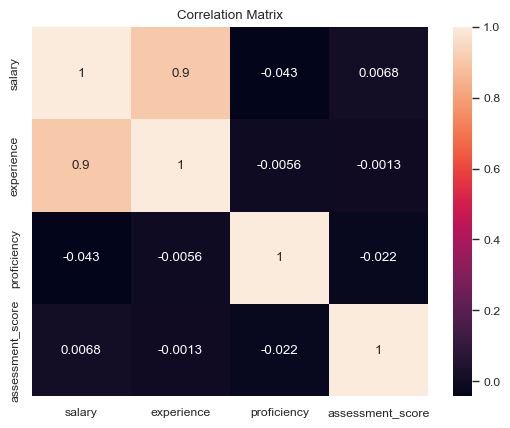

In [11]:
# Correlation heatmap
corr = final_df[['salary', 'experience', 'proficiency', 'assessment_score']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()


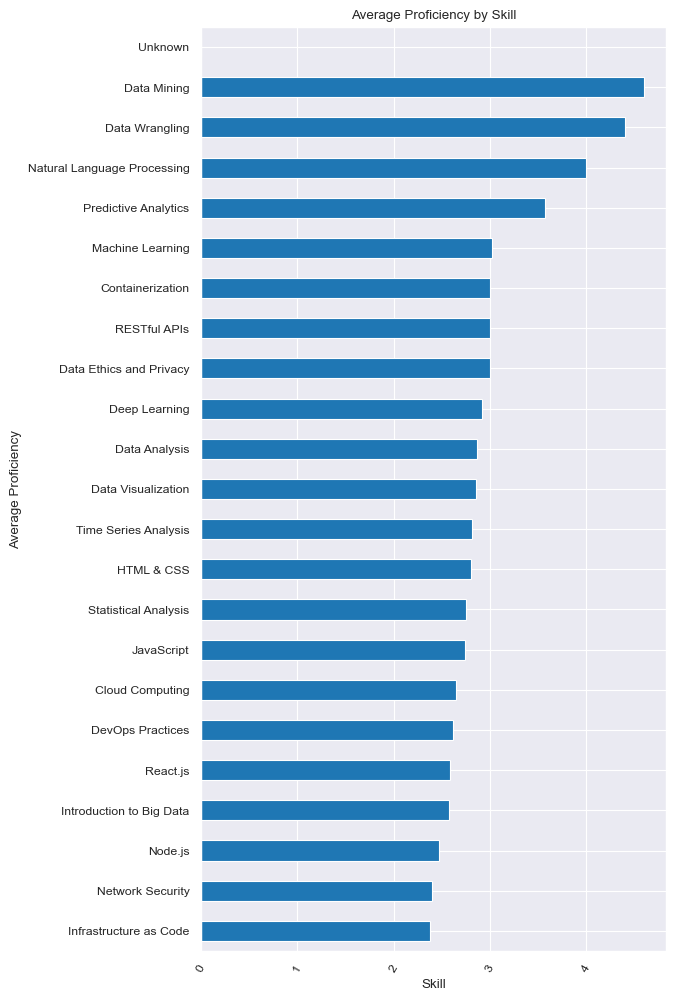

In [12]:
# Average proficiency by skill
plt.figure(figsize=(6,12))
skill_proficiency = final_df.groupby('skillname')['proficiency'].mean().sort_values()
skill_proficiency.plot(kind='barh')
plt.title('Average Proficiency by Skill')
plt.xlabel('Skill')
plt.ylabel('Average Proficiency')
plt.xticks(rotation=60)
plt.show()


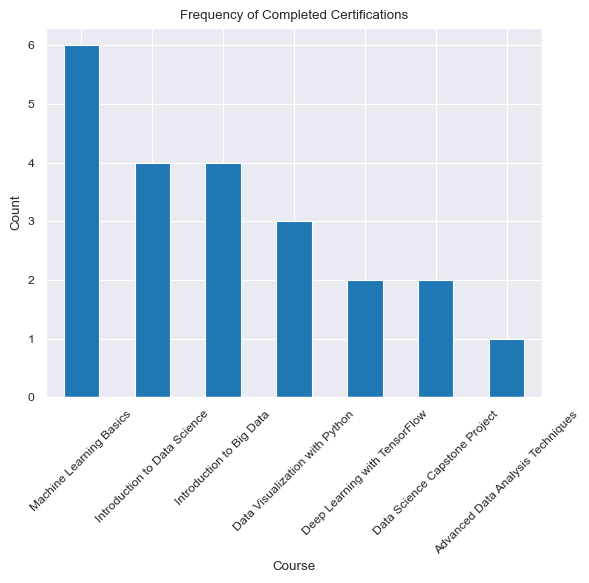

In [13]:
# Count of certifications
cert_count = final_df['CourseName'].value_counts()
cert_count.plot(kind='bar')
plt.title('Frequency of Completed Certifications')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


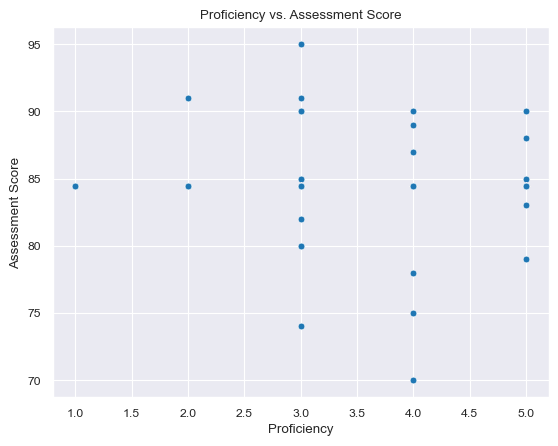

In [14]:
sns.scatterplot(data = final_df, x='proficiency', y='assessment_score', palette='tab10')
plt.title('Proficiency vs. Assessment Score')
plt.xlabel('Proficiency')
plt.ylabel('Assessment Score')
plt.show()



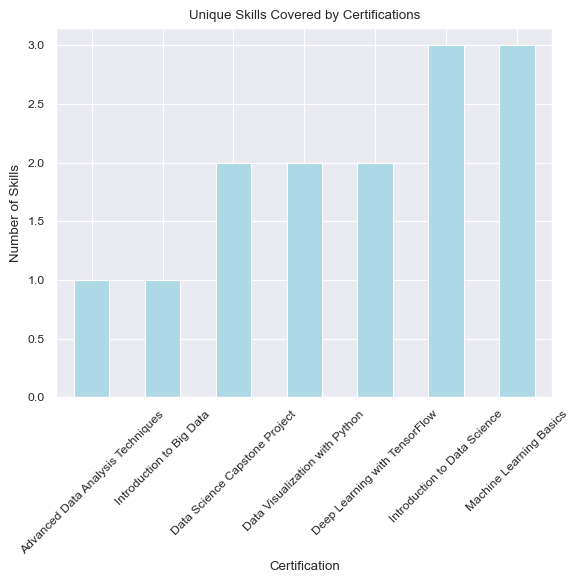

In [15]:
cert_skill = final_df.groupby('CourseName')['skillname'].nunique().sort_values()
cert_skill.plot(kind='bar', color='lightblue')
plt.title('Unique Skills Covered by Certifications')
plt.xlabel('Certification')
plt.ylabel('Number of Skills')
plt.xticks(rotation=45)
plt.show()



## Feature Engineering

In [16]:
employee_avg_score = final_df.groupby('empid')['assessment_score'].mean().rename('avg_assessment_score')

skill_category_proficiency = final_df.groupby(['empid', 'skillname'])['proficiency'].mean().unstack().fillna(0)


In [17]:
# Total number of completed certifications
course_completion = final_df.groupby('empid')['courseid'].nunique().rename('total_courses_completed')

# Binary certification status
certification_status = final_df.groupby('empid')['completionDate'].count().apply(lambda x: 1 if x > 0 else 0).rename('certified')

# Merge with the original DataFrame
final_df = final_df.merge(employee_avg_score, on='empid', how='left')
final_df = final_df.merge(course_completion, on='empid', how='left')
final_df = final_df.merge(certification_status, on='empid', how='left')


In [18]:
from datetime import datetime

# Calculate tenure in years
final_df['tenure'] = (datetime.now() - pd.to_datetime(final_df['hire_date'])).dt.days / 365

# Time since last course completion
final_df['completionDate'] = pd.to_datetime(final_df['completionDate'])
final_df['days_since_last_course'] = (datetime.now() - final_df['completionDate']).dt.days


In [19]:
# One-hot encoding for designations
designation_dummies = pd.get_dummies(final_df['designation'], prefix='designation')

final_df = pd.concat([final_df, designation_dummies], axis=1)


In [20]:
# SKill gap
final_df['low_proficiency'] = final_df['proficiency'].apply(lambda x: 1 if x < 3 else 0)

skills_gap = final_df.groupby('empID')['low_proficiency'].sum().rename('skills_below_threshold')
final_df = final_df.merge(skills_gap, on='empID', how='left')


In [21]:
# Most recent course and skill
final_df['most_recent_course'] = final_df.sort_values(by='completionDate').groupby('empid')['CourseName'].transform('last')
final_df['most_recent_skill'] = final_df.sort_values(by='completionDate').groupby('empid')['skillname'].transform('last')


In [22]:
# Drop unnecessary columns
features_df = final_df.drop(['empname', 'skillname', 'CourseName', 'completionDate', 'hire_date'], axis=1)

# Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = ['avg_assessment_score', 'total_courses_completed', 'tenure', 'salary']
features_df[numeric_columns] = scaler.fit_transform(features_df[numeric_columns])


In [23]:
features_df.columns

Index(['empid', 'designation', 'experience', 'birth_date', 'salary', 'gender',
       'activestatus', 'created_at', 'skillid', 'proficiency', 'category',
       'assessmentid', 'courseid', 'assessment_score', 'max_score', 'due_date',
       'test_taken', 'test_completed', 'empID', 'courseID', 'startDate',
       'CourseID', 'CourseDuration', 'Description', 'avg_assessment_score',
       'total_courses_completed', 'certified', 'tenure',
       'days_since_last_course', 'designation_Principal Architect',
       'designation_Software Engineer', 'designation_Solutions Consultant',
       'designation_Solutions Enabler', 'designation_Sr. Software Engineer',
       'low_proficiency', 'skills_below_threshold', 'most_recent_course',
       'most_recent_skill'],
      dtype='object')

In [24]:
X = features_df.drop('empid', axis=1)
emp_ids = features_df['empid'].values

In [25]:
X.columns

Index(['designation', 'experience', 'birth_date', 'salary', 'gender',
       'activestatus', 'created_at', 'skillid', 'proficiency', 'category',
       'assessmentid', 'courseid', 'assessment_score', 'max_score', 'due_date',
       'test_taken', 'test_completed', 'empID', 'courseID', 'startDate',
       'CourseID', 'CourseDuration', 'Description', 'avg_assessment_score',
       'total_courses_completed', 'certified', 'tenure',
       'days_since_last_course', 'designation_Principal Architect',
       'designation_Software Engineer', 'designation_Solutions Consultant',
       'designation_Solutions Enabler', 'designation_Sr. Software Engineer',
       'low_proficiency', 'skills_below_threshold', 'most_recent_course',
       'most_recent_skill'],
      dtype='object')

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import cosine_similarity

In [101]:
courses_skills_merged_df = pd.merge(pd.merge(courses_df, course_skill_df, left_on="CourseID", right_on="courseid"),
                            skills_df, on="skillid")

In [102]:
courses_final_df = courses_skills_merged_df[["courseid", "skillid", 'category', "CourseDuration"]]
courses_final_df.head()

,courseid,skillid,category,CourseDuration
0,1,1,Data Science,4
1,5,1,Data Science,3
2,7,1,Data Science,6
3,9,1,Data Science,3
4,1,2,Data Science,4


In [29]:
features_df.columns

Index(['empid', 'designation', 'experience', 'birth_date', 'salary', 'gender',
       'activestatus', 'created_at', 'skillid', 'proficiency', 'category',
       'assessmentid', 'courseid', 'assessment_score', 'max_score', 'due_date',
       'test_taken', 'test_completed', 'empID', 'courseID', 'startDate',
       'CourseID', 'CourseDuration', 'Description', 'avg_assessment_score',
       'total_courses_completed', 'certified', 'tenure',
       'days_since_last_course', 'designation_Principal Architect',
       'designation_Software Engineer', 'designation_Solutions Consultant',
       'designation_Solutions Enabler', 'designation_Sr. Software Engineer',
       'low_proficiency', 'skills_below_threshold', 'most_recent_course',
       'most_recent_skill'],
      dtype='object')

## Model Training

In [71]:
numerical_features = ['experience', 'proficiency', 'assessment_score']
categorical_features = ['category']

In [82]:
# Employee Features pipeline

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features: Impute missing values, then one-hot encode
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ],
    remainder="drop"
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

employee_features = pipeline.fit_transform(features_df)

In [83]:
# Course Features Pipeline

numerical_course_features = ['CourseDuration']

# Categorical features for courses
categorical_course_features = ['category']

numerical_course_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline for course features
categorical_course_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
course_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_course_pipeline, numerical_course_features),
        ('cat', categorical_course_pipeline, categorical_course_features),
    ],
    remainder="drop"
)

course_features = course_preprocessor.fit_transform(courses_final_df)

In [86]:
similarity_matrix = cosine_similarity(employee_features[:,:4], course_features)

In [90]:
# Recommendation using similarity 
def recommend_courses(employee_id, top_n=2):
    employee_idx = features_df[features_df['empid'] == employee_id].index[0]
    similarity_scores = list(enumerate(similarity_matrix[employee_idx]))
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get top N recommendations
    top_courses = [courses_final_df['courseid'].iloc[i[0]] for i in sorted_scores[:top_n]]
    return top_courses

In [116]:
recommended_courses = recommend_courses(employee_id=45, top_n=3)

recommend_courses_name = [
    courses_skills_merged_df.loc[courses_skills_merged_df["courseid"] == courseid, "CourseName"].values[0]
    if len(courses_skills_merged_df.loc[courses_skills_merged_df["courseid"] == courseid, "CourseName"].values) > 0
    else "Course not found"
    for courseid in recommended_courses
]

print("Recommended courses for employee:", set(recommend_courses_name))


Recommended courses for employee: {'Monitoring and Logging in Cloud', 'Network Security Fundamentals', 'Cloud Computing Essentials'}
